<a href="https://colab.research.google.com/github/zkinard/CS-4410-Intro-to-Machine-Learning/blob/main/KinardWeek2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
%matplotlib inline
from sklearn.datasets import load_diabetes

In [7]:
diabetes = load_diabetes()


In [8]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [9]:
diabetes.data.shape

(442, 10)

In [10]:
diabetes.target.shape

(442,)

In [11]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [14]:
import pandas as pd

In [18]:
pd.set_option('display.precision', 4) #4 digits precision for floats

In [ ]:
# Used for command line outputs in IPython interactive mode
#pd.set_option('max_columns', 11)  # display up to 9 columns in DataFrame outputs

#pd.set_option('display.width', None)  # auto-detect the display width for wrapping

In [19]:
diabetes_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [20]:
diabetes_df['DiseaseProgression'] = pd.Series(diabetes.target)

In [21]:
diabetes_df.head() #peek at first 5 rows

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0


In [22]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,4.4200e+02,442.0000
mean,-2.5118e-19,1.2308e-17,-2.2456e-16,-4.7976e-17,-1.3815e-17,3.9184e-17,-5.7772e-18,-9.0425e-18,9.2937e-17,1.1303e-17,152.1335
std,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,4.7619e-02,77.0930
min,-1.0723e-01,-4.4642e-02,-9.0275e-02,-1.1240e-01,-1.2678e-01,-1.1561e-01,-1.0231e-01,-7.6395e-02,-1.2610e-01,-1.3777e-01,25.0000
25%,-3.7299e-02,-4.4642e-02,-3.4229e-02,-3.6656e-02,-3.4248e-02,-3.0358e-02,-3.5117e-02,-3.9493e-02,-3.3246e-02,-3.3179e-02,87.0000
50%,5.3831e-03,-4.4642e-02,-7.2838e-03,-5.6704e-03,-4.3209e-03,-3.8191e-03,-6.5845e-03,-2.5923e-03,-1.9472e-03,-1.0777e-03,140.5000
75%,3.8076e-02,5.0680e-02,3.1248e-02,3.5644e-02,2.8358e-02,2.9844e-02,2.9312e-02,3.4309e-02,3.2432e-02,2.7917e-02,211.5000
max,1.1073e-01,5.0680e-02,1.7056e-01,1.3204e-01,1.5391e-01,1.9879e-01,1.8118e-01,1.8523e-01,1.3360e-01,1.3561e-01,346.0000


In [24]:
sample_df = diabetes_df.sample(frac=0.1, random_state=17)

In [25]:
import matplotlib.pyplot as plt


In [26]:
import seaborn as sns

In [ ]:
#sns.set(font_scale=2)

In [27]:
sns.set_style('whitegrid')

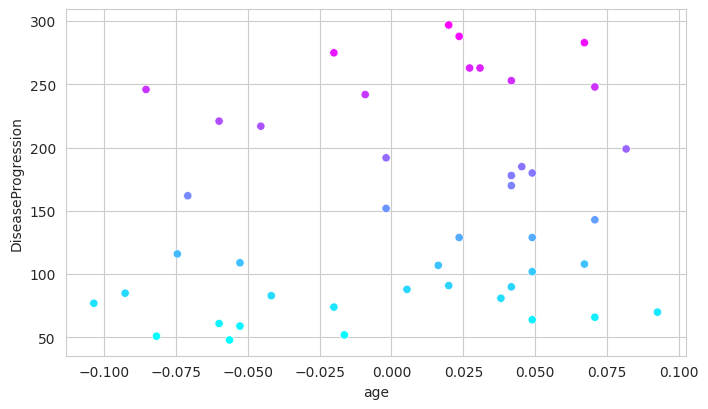

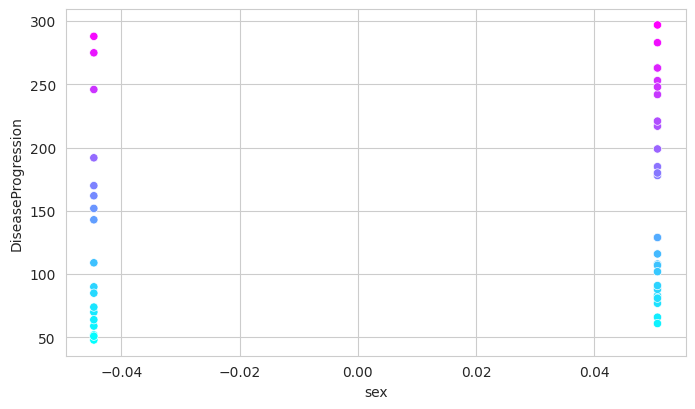

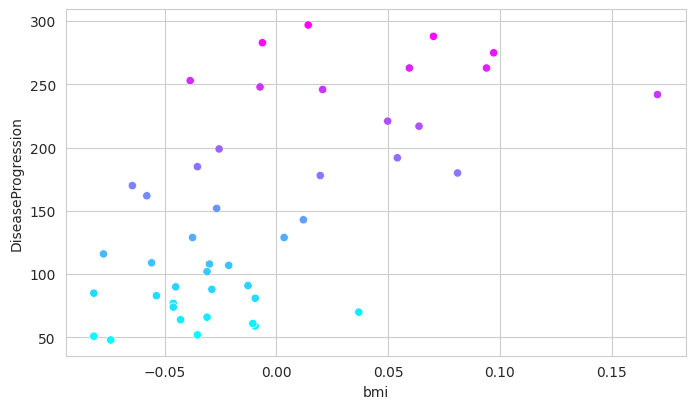

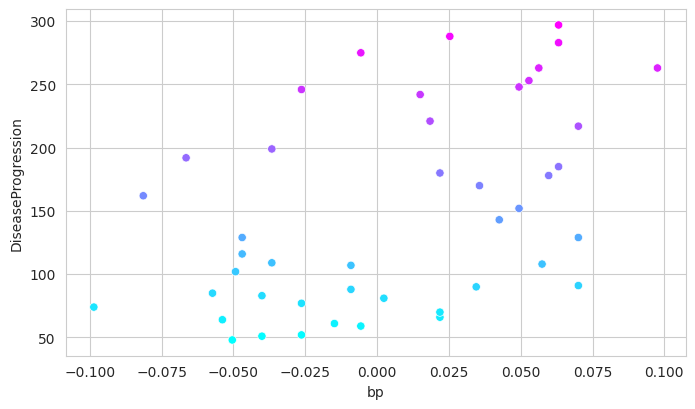

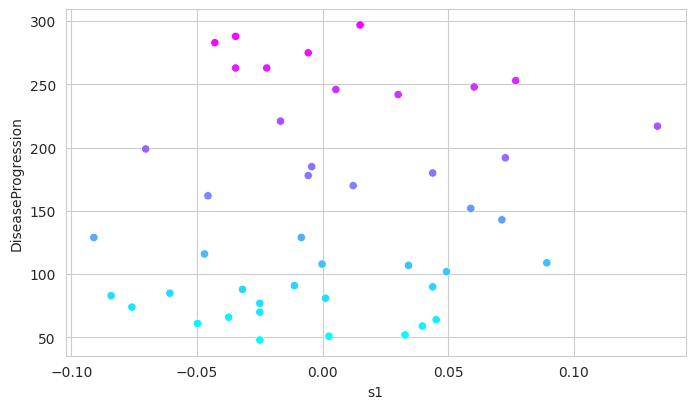

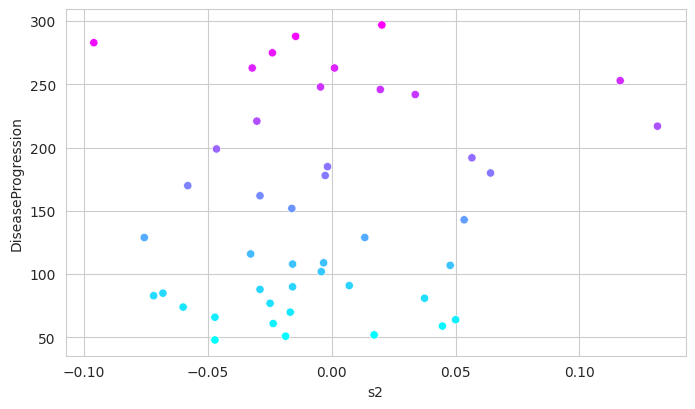

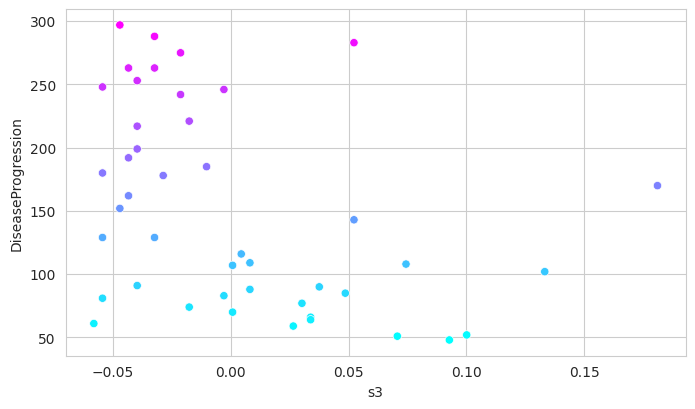

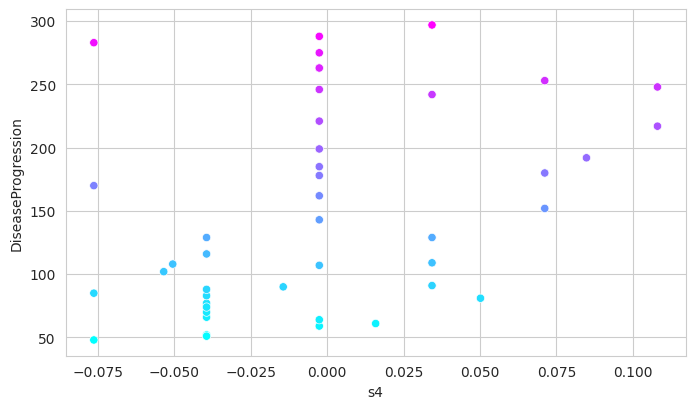

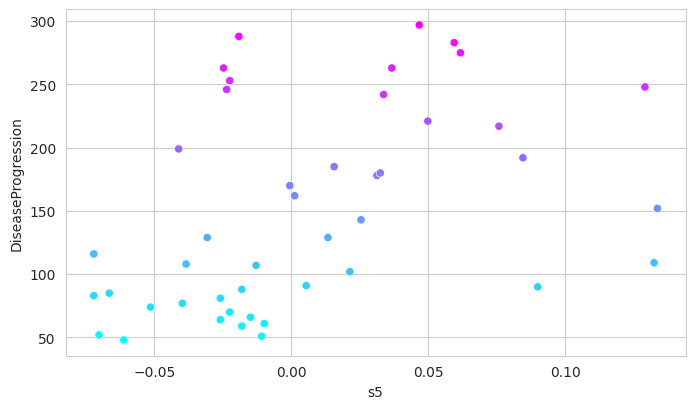

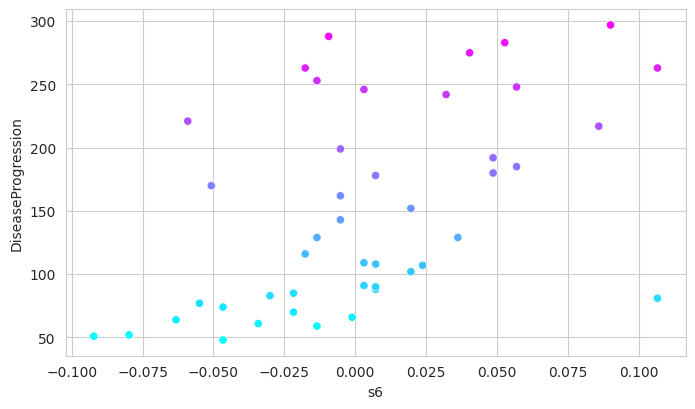

In [29]:
for feature in diabetes.feature_names:
    plt.figure(figsize=(8, 4.5))
    sns.scatterplot(data=sample_df, x=feature, y='DiseaseProgression',
                    hue = 'DiseaseProgression', palette = 'cool', legend =False)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    diabetes.data, diabetes.target, random_state=11)

In [32]:
X_train.shape

(331, 10)

In [33]:
X_test.shape

(111, 10)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
linear_regression = LinearRegression()

In [36]:
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [39]:
for i, name in enumerate(diabetes.feature_names):
    print(f'{name:>10}: {linear_regression.coef_[i]}')

       age: -60.21981405677291
       sex: -266.45705232203574
       bmi: 523.0634112596993
        bp: 310.5134699670048
        s1: -336.1614738106944
        s2: 137.3392923842451
        s3: -131.13923283453653
        s4: -1.1492348017315557
        s5: 622.3286855688128
        s6: 60.466457691682535


In [40]:
linear_regression.intercept_

152.22822762230342

In [41]:
predicted = linear_regression.predict(X_test)

In [42]:
expected = y_test

In [43]:
predicted[:5] #first 5 predictions

array([115.46474836,  83.4585369 , 160.77727376, 187.65710274,
        72.72122197])

In [44]:
expected[:5] #first 5 targets

array([ 79.,  55., 109., 178.,  39.])

In [45]:
df = pd.DataFrame()

In [46]:
df['Expected'] = pd.Series(expected)

In [47]:
df['Predicted'] = pd.Series(predicted)

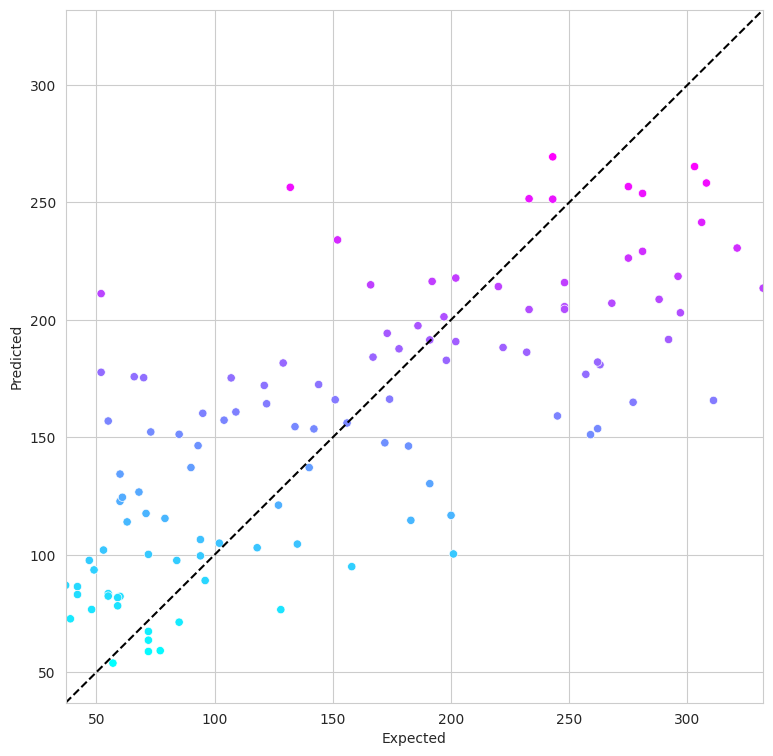

In [48]:
figure = plt.figure(figsize=(9, 9))

axes = sns.scatterplot(data=df, x='Expected', y='Predicted',
    hue='Predicted', palette='cool', legend=False)

start = min(expected.min(), predicted.min())

end = max(expected.max(), predicted.max())

axes.set_xlim(start, end)

axes.set_ylim(start, end)

line = plt.plot([start, end], [start, end], 'k--')

In [49]:
from sklearn import metrics

In [50]:
metrics.r2_score(expected, predicted)

0.5322429620529407

In [51]:
from sklearn.linear_model import ElasticNet, Lasso, Ridge

In [52]:
estimators = {
    'LinearRegression': linear_regression,
    'ElasticNet': ElasticNet(),
    'Lasso': Lasso(),
    'Ridge': Ridge()
}

In [54]:
from sklearn.model_selection import KFold, cross_val_score

In [55]:
for estimator_name, estimator_object in estimators.items():
  kfold = KFold(n_splits=10, random_state=11, shuffle=True)
  scores = cross_val_score(estimator=estimator_object,
                          X=diabetes.data, y=diabetes.target, cv=kfold, scoring='r2')
  print(f'{estimator_name:16}: ' +
        f'mean of r2 scores={scores.mean():.3f}')

LinearRegression: mean of r2 scores=0.475
ElasticNet      : mean of r2 scores=-0.002
Lasso           : mean of r2 scores=0.339
Ridge           : mean of r2 scores=0.421
